In [32]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd

folder_path = "/Users/rohinpalsule/Documents/GitHub/GraphWalkFlights/Graph-Walk-Flight_Psiturk_by_Jerry_Rohin/data"

df_list = []

# Iterate through all CSV files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file)
        print(f"Reading: {file}")
        try:
            df_individual = pd.read_csv(file_path, on_bad_lines='skip')
            if 'Peoria' in df_individual['cities'][0]:
                df_individual['city_type'] = 'US'
            else: df_individual['city_type'] = 'Fictional'
            df_list.append(df_individual)
        except Exception as e:
            print(f"Error reading {file}: {e}")

# Concatenate all DataFrames
df = pd.concat(df_list, ignore_index=True)


Reading: S_Kirthin V. Rajkumar_2011_243.csv
Reading: final_S_ .csv


In [40]:
# Adding partid from worker id

df['partid'] = df['responses'].str.replace('{worker_id:',"").str.replace('}', '').str.replace("Kirthin V. Rajkumar","Kirthin") # for clarity
df.loc[df['partid'] == ' ', 'partid'] = 'Rayan' # Replacing id " " w his name
df['partid'] = df['partid'].ffill()

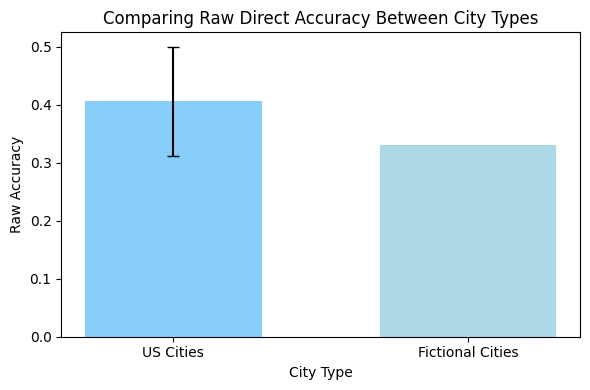

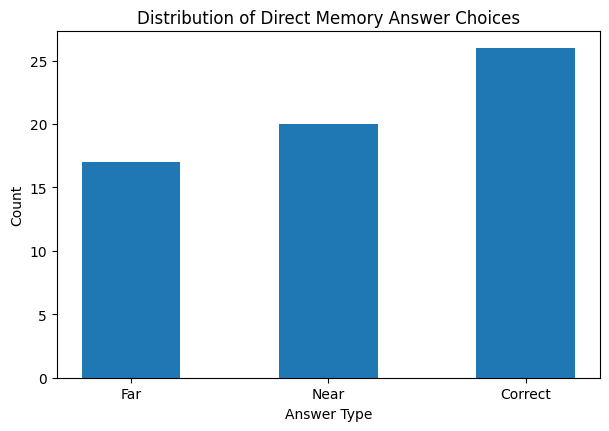

In [ ]:
# Direct Memory df

direct_df = df[df['trial_type']=='directmemory_phase']

direct_df = direct_df.loc[:, ~direct_df.isna().all()]
direct_df = direct_df.drop(columns=['time_elapsed','cumulative_accuracy','weighted_accuracy','missedtrial']).reset_index(drop='index')
direct_df = direct_df.map(lambda x: x.replace('../static/images/US_Cities_List/', '') if isinstance(x, str) else x)
direct_df = direct_df.map(lambda x: x.replace('../static/images/Fictional_Cities_List/', '') if isinstance(x, str) else x)

def get_chosen_city(row):
    if  row['key_press'] == 49:
        return row['stimulus_down_left']
    elif  row['key_press'] == 50:
        return row['stimulus_down_mid']
    elif  row['key_press'] == 51:
        return row['stimulus_down_right']
    else: return pd.NA

def get_wrong_distance(row):
    if pd.isna(row['stimulus_selected']):
        return pd.NA
    elif row['stimulus_selected'] == row['stimulus_short']:
        return 'close'
    elif row['stimulus_selected'] == row['stimulus_far']:
        return 'far'
    elif row['stimulus_selected'] == row['stimulus_correct']:
        return 'correct'
    else: return pd.NA

def get_weighted_correct(row):
    if pd.isna(row['wrong_distance']):
        return pd.NA
    elif row['wrong_distance'] == 'close':
        return 0.5
    elif row['wrong_distance'] == 'far':
        return 0
    elif row['wrong_distance'] == 'correct':
        return 1
    else: return pd.NA

direct_df['stimulus_selected'] = direct_df.apply(get_chosen_city,axis=1)
direct_df['wrong_distance'] = direct_df.apply(get_wrong_distance,axis=1)
direct_df['weighted_correct'] = direct_df.apply(get_weighted_correct,axis=1)


direct_US = direct_df[direct_df['city_type'] == 'US'].groupby('partid')['accuracy'].mean()
direct_fictional = direct_df[direct_df['city_type'] == 'Fictional'].groupby('partid')['accuracy'].mean()

# Bar chart of prob
plt.figure(figsize=(6,4))
plt.bar(x=0.25,height=direct_US.mean(),yerr=direct_US.sem(),capsize=4,color='lightskyblue',width=0.3,label='US Cities')
plt.bar(x=0.75,height= 0.33,yerr=direct_fictional.sem(),capsize=4,color='lightblue',width=0.3,label='Fictional Cities')
plt.xticks([0.25,0.75],['US Cities','Fictional Cities'])
plt.xlabel("City Type")
plt.ylabel("Raw Accuracy")
plt.title("Comparing Raw Direct Accuracy Between City Types")
plt.tight_layout()
plt.show()

# Histogram of weighted prob
plt.figure(figsize=(6,4))
plt.hist(direct_df[~direct_df['weighted_correct'].isna()]['weighted_correct'],5)
plt.tight_layout()
plt.title("Distribution of Direct Memory Answer Choices")
plt.xticks([0.1,0.5,0.9],['Far',"Near","Correct"])
plt.ylabel("Count")
plt.xlabel("Answer Type")
plt.show()

In [ ]:
# Relative Distance Judgement Analysis
shortest_df = df[df['trial_type']=='shortestpath_phase']

shortest_df = shortest_df.loc[:, ~shortest_df.isna().all()]
shortest_df = shortest_df.drop(columns=['time_elapsed','cumulative_accuracy']).reset_index(drop='index')
shortest_df = shortest_df.map(lambda x: x.replace('../static/images/US_Cities_List/', '') if isinstance(x, str) else x)
shortest_df = shortest_df.map(lambda x: x.replace('../static/images/Fictional_Cities_List/', '') if isinstance(x, str) else x)
grouped_shortest = shortest_df.groupby(['partid','specific_pairs'])['accuracy'].agg(['mean','count']).reset_index()

twothree = grouped_shortest[grouped_shortest['specific_pairs']=='Two Edge Three Edge']
threefour = grouped_shortest[grouped_shortest['specific_pairs']=='Three Edge Four Edge']
fourfive = grouped_shortest[grouped_shortest['specific_pairs']=='Four Edge Five Edge']
fivesix = grouped_shortest[grouped_shortest['specific_pairs']=='Five Edge Six Edge']

twofour = grouped_shortest[grouped_shortest['specific_pairs']=='Two Edge Four Edge']
threefive = grouped_shortest[grouped_shortest['specific_pairs']=='Three Edge Five Edge']
foursix = grouped_shortest[grouped_shortest['specific_pairs']=='Four Edge Six Edge']

twofive = grouped_shortest[grouped_shortest['specific_pairs']=='Two Edge Five Edge']
threesix = grouped_shortest[grouped_shortest['specific_pairs']=='Three Edge Six Edge']

twosix = grouped_shortest[grouped_shortest['specific_pairs']=='Two Edge Six Edge']



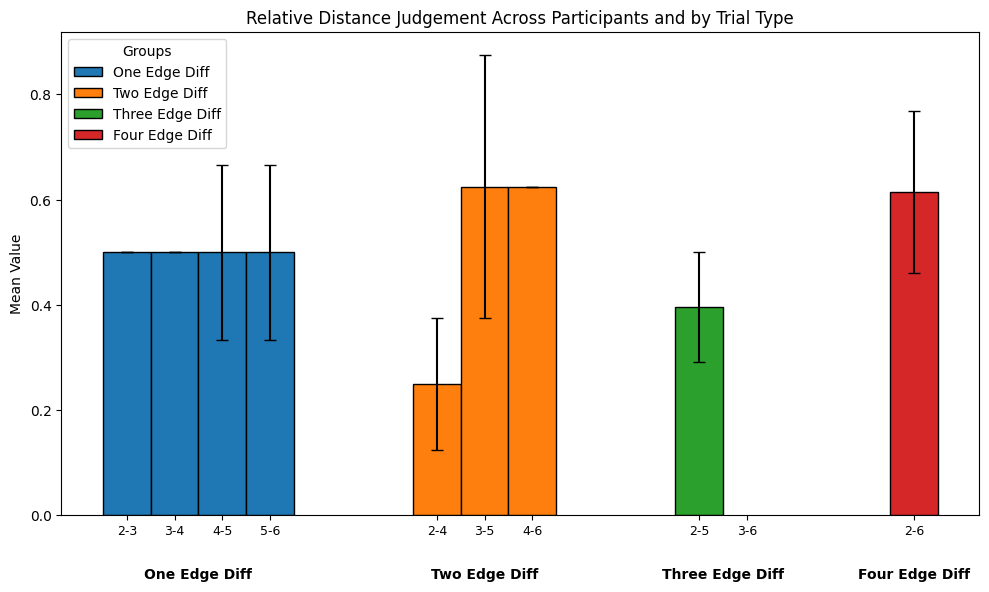

In [137]:
import matplotlib.pyplot as plt
import numpy as np

# --- Sample Data ---
group_labels = ['One Edge Diff', 'Two Edge Diff', 'Three Edge Diff', 'Four Edge Diff']
bar_counts = [4, 3, 2, 1]  # Number of bars per group

# Generate dummy data
heights = [
    [twothree['mean'].mean(), threefour['mean'].mean(), fourfive['mean'].mean(), fivesix['mean'].mean()],  # Group 1
    [twofour['mean'].mean(), threefive['mean'].mean(), foursix['mean'].mean()],       # Group 2
    [twofive['mean'].mean(), threesix['mean'].mean()],            # Group 3
    [twosix['mean'].mean()]                  # Group 4
]

errors = [
    [twothree['mean'].sem(), threefour['mean'].sem(), fourfive['mean'].sem(), fivesix['mean'].sem()],  # Group 1
    [twofour['mean'].sem(), threefive['mean'].sem(), foursix['mean'].sem()],       # Group 2
    [twofive['mean'].sem(), threesix['mean'].sem()],            # Group 3
    [twosix['mean'].sem()]                  # Group 4
]

bar_labels = [
    ['2-3', '3-4', '4-5', '5-6'],     # Group 1
    ['2-4', '3-5', '4-6'],          # Group 2
    ['2-5', '3-6'],               # Group 3
    ['2-6']                    # Group 4
]

bar_width = 0.2
group_gap = 0.5

fig, ax = plt.subplots(figsize=(10, 6))

x_offset = 0
all_positions = []
all_labels = []
group_centers = []

for i, (group, group_err, labels) in enumerate(zip(heights, errors, bar_labels)):
    num_bars = len(group)
    positions = np.arange(num_bars) * bar_width + x_offset
    ax.bar(positions, group, yerr=group_err, capsize=4, width=bar_width, edgecolor='black', label=group_labels[i])
    
    # Store positions and labels for x-ticks
    all_positions.extend(positions)
    all_labels.extend(labels)
    
    # Calculate center of group for big group label
    group_centers.append(positions.mean())
    
    # Update x offset for next group
    x_offset = positions[-1] + bar_width + group_gap

# Set small bar labels as x-tick labels
ax.set_xticks(all_positions)
ax.set_xticklabels(all_labels, fontsize=9)

# Add big group labels below
for center, label in zip(group_centers, group_labels):
    ax.text(center, -0.1, label, ha='center', va='top', fontsize=10, fontweight='bold', transform=ax.transData)


# --- Formatting ---
ax.legend(title='Groups')
ax.set_ylabel('Mean Value')
ax.set_title('Relative Distance Judgement Across Participants and by Trial Type')
plt.tight_layout()
plt.show()

In [ ]:
twothree['mean']['mean'].mean()

np.float64(0.5)